In [8]:
import pandas as pd

import matplotlib.pyplot as plt

In [3]:
insurance_data = pd.read_csv('dataset/insurance.csv')

insurance_data.sample(10)

,age,sex,bmi,children,smoker,region,charges
331,52,male,27.360,0,yes,northwest,24393.62240
368,44,male,32.015,2,no,northwest,8116.26885
1271,25,female,34.485,0,no,northwest,3021.80915
478,21,male,36.850,0,no,southeast,1534.30450
718,51,female,36.670,2,no,northwest,10848.13430
1199,31,female,25.800,2,no,southwest,4934.70500
1336,21,female,25.800,0,no,southwest,2007.94500
1203,51,male,32.300,1,no,northeast,9964.06000
71,31,male,28.500,5,no,northeast,6799.45800
95,28,female,37.620,1,no,southeast,3766.88380


In [4]:
insurance_data.shape

(1338, 7)

In [5]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
insurance_data_correlation = insurance_data.corr()

insurance_data_correlation

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


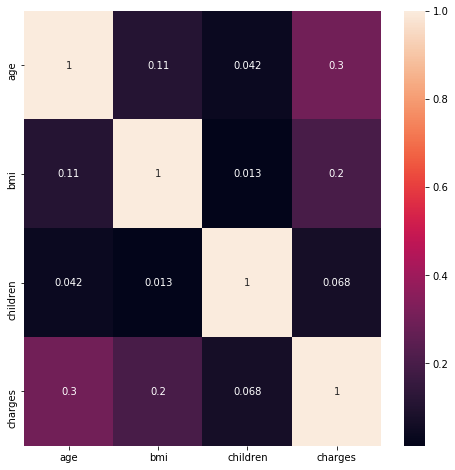

In [10]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(insurance_data_correlation, annot=True)

In [13]:
from sklearn import preprocessing

label_encoding = preprocessing.LabelEncoder()

In [14]:
insurance_data['region'] = label_encoding.fit_transform(insurance_data['region'].astype(str))

In [15]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,3,16884.92400
1,18,male,33.770,1,no,2,1725.55230
2,28,male,33.000,3,no,2,4449.46200
3,33,male,22.705,0,no,1,21984.47061
4,32,male,28.880,0,no,1,3866.85520


In [16]:
label_encoding.classes_

array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)

In [17]:
insurance_data = pd.get_dummies(insurance_data, columns=['sex',
                                                         'smoker'])

insurance_data.sample(10)

,age,bmi,children,region,charges,sex_female,sex_male,smoker_no,smoker_yes
1251,19,19.800,0,3,1241.56500,0,1,1,0
896,43,20.045,2,0,19798.05455,1,0,0,1
696,53,32.300,2,0,29186.48236,1,0,1,0
655,52,25.300,2,2,24667.41900,1,0,0,1
155,44,39.520,0,1,6948.70080,0,1,1,0
470,27,32.670,0,2,2497.03830,0,1,1,0
526,19,30.590,2,1,24059.68019,1,0,1,0
667,40,32.775,2,1,40003.33225,1,0,0,1
1065,42,25.300,1,3,7045.49900,1,0,1,0
513,19,30.400,0,3,1256.29900,0,1,1,0


In [18]:
insurance_data.to_csv('dataset/insurance_processed.csv', index=False)

In [19]:
!ls dataset

A_Z Handwritten Data.csv  _DS_Store                 insurance.csv
Advertising.csv           _ipynb_checkpoints        insurance_processed.csv
PimaIndians.csv           dbpedia.csv               mouse.csv
PimaIndians_processed.csv driver_dataset.csv


### Loading Dataset

In [20]:
insurance_data = pd.read_csv('dataset/insurance_processed.csv')

insurance_data.sample(10)

,age,bmi,children,region,charges,sex_female,sex_male,smoker_no,smoker_yes
937,39,24.225,5,1,8965.79575,1,0,1,0
196,39,32.800,0,3,5649.71500,1,0,1,0
293,22,28.820,0,2,2156.75180,1,0,1,0
1064,29,25.600,4,3,5708.86700,1,0,1,0
1190,31,32.775,2,1,5327.40025,1,0,1,0
590,58,29.000,0,3,11842.44200,1,0,1,0
31,18,26.315,0,0,2198.18985,1,0,1,0
712,43,30.685,2,1,8310.83915,1,0,1,0
940,18,23.210,0,2,1121.87390,0,1,1,0
1073,54,28.880,2,0,12096.65120,1,0,1,0


In [21]:
insurance_data.shape

(1338, 9)

In [22]:
X = insurance_data.drop('charges', axis=1)

Y = insurance_data['charges']

In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [25]:
x_train.shape, y_train.shape

((1070, 8), (1070,))

In [26]:
x_test.shape, y_test.shape

((268, 8), (268,))

### Bagging Regressor
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html

In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

In [36]:
bag_reg = BaggingRegressor(DecisionTreeRegressor(), 
                           n_estimators=500,
                           bootstrap=True,
                           max_samples=0.8,
                           n_jobs=-1,
                           oob_score=True)

bag_reg.fit(x_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                      max_depth=None,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort=False,
                                                      random_state=None,
                                                      splitter='best'),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_sample

In [37]:
bag_reg.oob_score_

0.8270562886071255

In [38]:
y_pred = bag_reg.predict(x_test)

r2_score(y_test, y_pred)

0.8853634716970663

In [40]:
bag_reg = BaggingRegressor(DecisionTreeRegressor(), 
                           n_estimators=500,
                           bootstrap=False,
                           max_samples=0.9,
                           n_jobs=-1)

bag_reg.fit(x_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                      max_depth=None,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort=False,
                                                      random_state=None,
                                                      splitter='best'),
                 bootstrap=False, bootstrap_features=False, max_features=1.0,
                 max_sampl

In [41]:
y_pred = bag_reg.predict(x_test)

r2_score(y_test, y_pred)

0.8522386182497147